# PART 2 
---

In [1]:
import pandas as pd

In [57]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [5]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-×86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-03-05 20:22:04--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-%C3%9786_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-05 20:22:04 ERROR 404: Not Found.

chmod: Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
bash: ./Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - rdkit

Current channels:

  - https://conda.anaconda.org/rdkit/osx-arm64
  - https://conda.anaconda.org/rdkit/noarch
  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pk

In [6]:
!conda install -c conda-forge rdkit -y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::jupyterlab_server==2.22.0=py311hca03da5_0
  - defaults/osx-arm64::aiohttp==3.8.5=py311h80987f9_0
  - defaults/osx-arm64::_anaconda_depends==2023.09=py311_openblas_1
  - defaults/osx-arm64::anaconda-project==0.11.1=py311hca03da5_0
  - defaults/osx-arm64::anaconda-catalogs==0.2.0=py311hca03da5_0
  - defaults/osx-arm64::notebook==6.5.4=py311hca03da5_1
  - defaults/osx-arm64::twisted==22.10.0=py311h80987f9_0
  - defaults/osx-arm64::jsonschema==4.17.3=py311hca03da5_0
  - defaults/osx-arm64::nbconvert==6.5.4=py311hca03da5_0
  - defaults/osx-arm64::jupyter_server_ydoc==0.8.0=py311hca03da5_1
  - defaults/osx-arm64::jupyterlab==3.6.3=py311hca03da5_0
  - defaults/osx-arm64::s3fs==2023.4.0=py311hca03da5_0
  - defaults/osx-arm64::datasets==2.12.0=py311hca03da5_0
  - defaults/osx-arm64::spyder==5.4.3=py311hca03da5_1
  - defau

1. **`from rdkit import Chem`**:
   - `Chem` es un módulo central de RDKit que proporciona funciones y clases para manipular y trabajar con estructuras químicas y moléculas. Con este módulo, puedes leer, escribir y manipular estructuras químicas en diversos formatos, entre otras funcionalidades.

2. **`from rdkit.Chem import Descriptors, Lipinski`**:
   - `Descriptors`: Este submódulo contiene una serie de descriptores moleculares predefinidos, como el peso molecular, la logP (coeficiente de partición octanol-agua), el número de átomos de hidrógeno aceptores de enlaces de hidrógeno, entre otros. Puedes utilizar estos descriptores para caracterizar las propiedades físico-químicas de una molécula.

   - `Lipinski`: Este submódulo proporciona funciones específicas relacionadas con la "Regla de Cinco de Lipinski". Estas reglas son un conjunto de criterios que se utilizan comúnmente en el diseño de fármacos para evaluar si una molécula tiene propiedades adecuadas para la absorción oral y la permeabilidad celular. La Regla de Cinco de Lipinski se basa en cuatro descriptores moleculares (peso molecular, logP, número de donadores de enlaces de hidrógeno y número de aceptores de enlaces de hidrógeno).
      - **Peso Molecular (MW) ≤ 500 Daltons**:
            La masa molecular de la molécula (peso molecular) no debe exceder los 500 Daltons. Se considera que las moléculas con un peso molecular inferior a 500 Daltons tienen una mayor probabilidad de ser absorbidas por el tracto gastrointestinal.
      - **LogP (coeficiente de partición octanol-agua) ≤ 5**:
            El logP, que mide la lipofilicidad de una molécula, no debe ser superior a 5. El logP influye en la capacidad de una molécula para cruzar las membranas celulares y se prefiere que no sea excesivamente alto.
      - **Número de Donadores de Enlaces de Hidrógeno (HBD) ≤ 5**:
            El número de átomos de hidrógeno que actúan como donadores de enlaces de hidrógeno no debe ser superior a 5. Esta regla está relacionada con la capacidad de formar enlaces de hidrógeno con otros compuestos.
      - **Número de Aceptores de Enlaces de Hidrógeno (HBA) ≤ 10**:
            El número de átomos de oxígeno y nitrógeno que actúan como aceptores de enlaces de hidrógeno no debe ser superior a 10. Esta regla está relacionada con la capacidad de aceptar enlaces de hidrógeno.


In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [58]:
def lipinski(smiles, verbose=False):
    
    moldata = []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData,row])
        i=i+1
        
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data = baseData, columns= columnNames)
    
    return descriptors
        

In [59]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,active
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,intermediate
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,intermediate
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,intermediate
...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,50.1,intermediate
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0,inactive
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0,intermediate
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,42.0,intermediate


In [60]:
df_lipinski = lipinski(df.canonical_smiles)

In [61]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2885,296.410,4.02950,0.0,2.0
2886,373.416,3.11580,2.0,5.0
2887,369.446,3.85650,1.0,7.0
2888,299.355,2.40130,1.0,5.0


In [62]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,active
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,intermediate
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,intermediate
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,intermediate
...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,50.1,intermediate
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0,inactive
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0,intermediate
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,42.0,intermediate


In [63]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [64]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,active,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,intermediate,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,intermediate,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,intermediate,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,50.1,intermediate,296.410,4.02950,0.0,2.0
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0,inactive,373.416,3.11580,2.0,5.0
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0,intermediate,369.446,3.85650,1.0,7.0
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,42.0,intermediate,299.355,2.40130,1.0,5.0


In [65]:
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i*(10**-9) #Convierte nM en M
        pIC50.append(-np.log10(molar + 1e-10))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis=1)
    
    return x

In [66]:
df_combined.standard_value.describe()

count    2.890000e+03
mean     2.173576e+10
std      7.235369e+11
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      7.370000e+03
max      3.388442e+13
Name: standard_value, dtype: float64

In [67]:
def norm_value(input): 
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
        
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)
    
    return x

In [68]:
df_norm = norm_value(df_combined)

In [69]:
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,active,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,intermediate,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,intermediate,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,intermediate,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,intermediate,296.410,4.02950,0.0,2.0,50.1
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,10000.0
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,intermediate,369.446,3.85650,1.0,7.0,31.0
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,intermediate,299.355,2.40130,1.0,5.0,42.0


In [70]:
df_norm.standard_value_norm.describe()

count    2.890000e+03
mean     3.189192e+05
std      4.950774e+06
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      7.370000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [71]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,active,329.528,4.28820,2.0,2.0,5.148736
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301029
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,intermediate,412.306,5.70542,0.0,3.0,6.623241
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,intermediate,319.383,4.63450,0.0,3.0,7.243364
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,intermediate,321.811,4.58780,0.0,3.0,7.266803
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,intermediate,296.410,4.02950,0.0,2.0,7.299296
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,4.999996
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,intermediate,369.446,3.85650,1.0,7.0,7.507240
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,intermediate,299.355,2.40130,1.0,5.0,7.375718


In [72]:
df_final.pIC50.describe()

count    2890.000000
mean        6.080917
std         1.389843
min         1.000000
25%         5.132527
50%         5.999957
75%         6.999566
max        10.000000
Name: pIC50, dtype: float64

In [73]:
df_2class= df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,active,329.528,4.28820,2.0,2.0,5.148736
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301029
5,CHEMBL324070,Cc1ccc(S(=O)(=O)n2cc(C(c3ccccc3)n3ccnc3)c3cccc...,active,427.529,5.02092,0.0,5.0,5.267598
11,CHEMBL37321,CCCCCCN1C(=O)CCC(CC)(c2ccncc2)C1=O,active,302.418,3.45870,0.0,3.0,5.180449
12,CHEMBL353068,c1ccc2c(c1)CCC1C(c3cc[nH]n3)C21,inactive,210.280,2.85310,1.0,1.0,4.292429
...,...,...,...,...,...,...,...,...
2855,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,232.283,1.35320,2.0,3.0,4.999996
2859,CHEMBL276915,O=c1cc(-c2ccccc2)oc2cc(O)ccc12,active,238.242,3.16560,1.0,3.0,5.721224
2867,CHEMBL5185187,COc1ccc(C(c2cc3cc(Cl)ccc3o2)n2cncn2)cc1,active,339.782,4.32400,0.0,5.0,5.999957
2868,CHEMBL5177518,CCC#CCOc1ccc(C(c2cc3cc(Cl)ccc3o2)n2cncn2)cc1,active,391.858,5.10760,0.0,5.0,5.999957


In [74]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

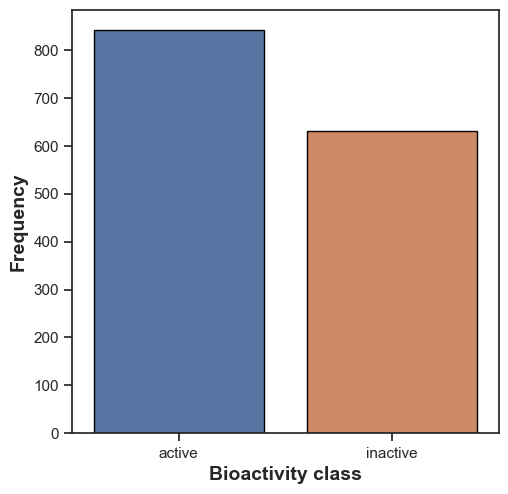

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data= df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot

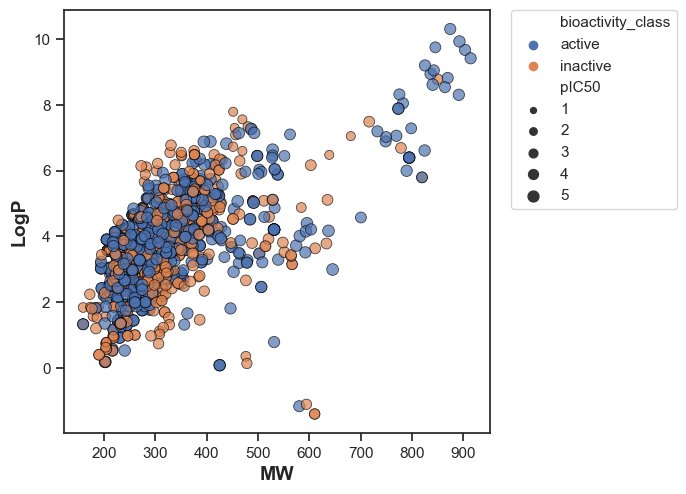

In [77]:
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

plt.savefig('plot_MW_vs_LogP.pdf')

### Box plots

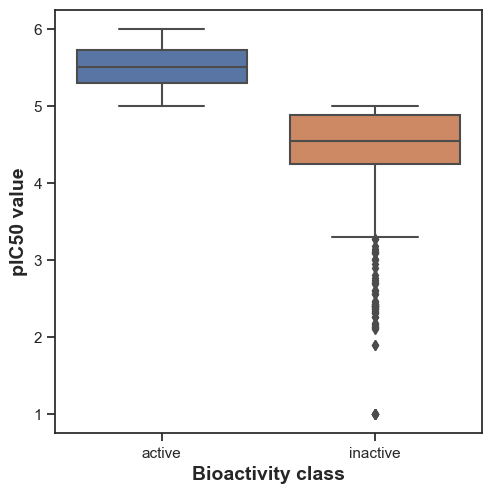

In [78]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [81]:
def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    seed(1)
    
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    #Comparacion
    stat, p = mannwhitneyu(active, inactive) 
    #stat es la estadística de la prueba, y p es el valor p que indica la significancia estadística de la diferencia observada.


    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results

In [80]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,531302.0,3.282079e-237,0.05,Different distribution (reject H0)


### MW

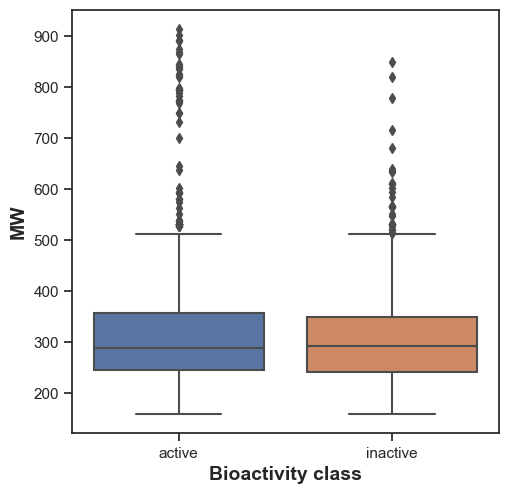

In [82]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [83]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,270647.0,0.536322,0.05,Same distribution (fail to reject H0)


### LogP

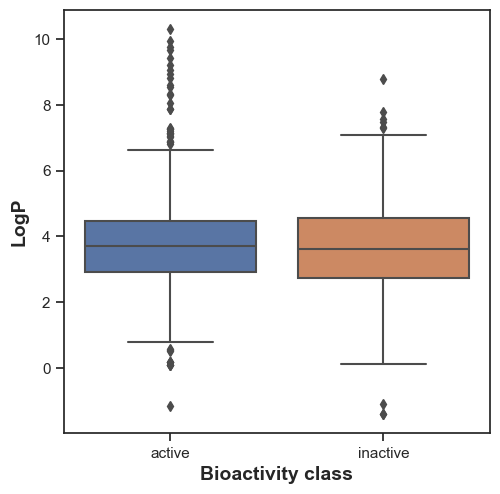

In [84]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [85]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,276900.0,0.163794,0.05,Same distribution (fail to reject H0)


### NumHDonors

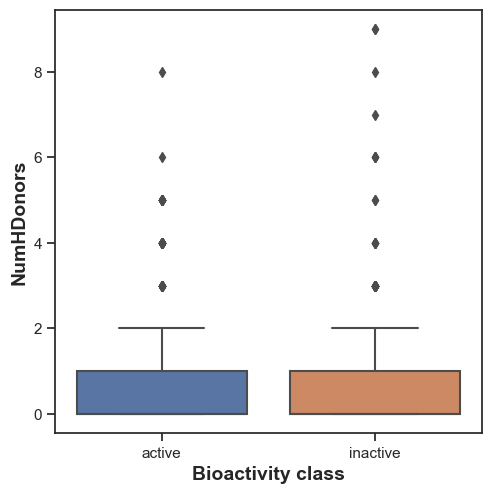

In [86]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [88]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,254999.0,0.137374,0.05,Same distribution (fail to reject H0)


### NumHAcceptors

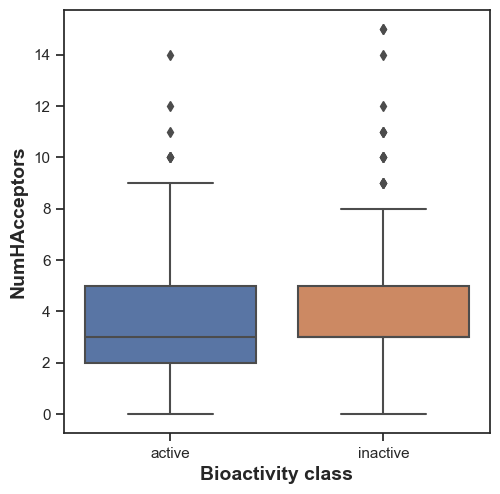

In [89]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [90]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,264811.0,0.915318,0.05,Same distribution (fail to reject H0)


## Interpretación de los resultados estadísticos:

Los valores de pIC50 tuvieron una diferencia estadística significante con respecto a los valores activos e inactivos. Mientras que el resto de Descriptors no tuvieron una diferencia significante, por ende no se rechaza la Hipotesis Nula (H0) en estos casos.

---

1. **pIC50:**
   - Estadística de la prueba (U): 531302.0
   - Valor p: \(3.282079 \times 10^{-237}\)
   - Nivel de significancia (alpha): 0.05

   Interpretación: Dado que el valor p (\(3.282079 \times 10^{-237}\)) es significativamente menor que el nivel de significancia (0.05), rechazamos la hipótesis nula (reject H0). La interpretación es "Different distribution", lo que significa que hay evidencia estadística para concluir que las distribuciones de pIC50 para las clases "active" e "inactive" son diferentes.
---
2. **MW (Peso Molecular):**
   - Estadística de la prueba (U): 270647.0
   - Valor p: 0.536322
   - Nivel de significancia (alpha): 0.05

   Interpretación: Dado que el valor p (0.536322) es mayor que el nivel de significancia (0.05), no hay suficiente evidencia para rechazar la hipótesis nula. La interpretación es "Same distribution", indicando que no hay diferencias estadísticas significativas en la distribución de pesos moleculares para las clases "active" e "inactive".
---
3. **LogP (Coeficiente de Partición Octanol-Agua):**
   - Estadística de la prueba (U): 276900.0
   - Valor p: 0.163794
   - Nivel de significancia (alpha): 0.05

   Interpretación: Dado que el valor p (0.163794) es mayor que el nivel de significancia (0.05), no hay suficiente evidencia para rechazar la hipótesis nula. La interpretación es "Same distribution", indicando que no hay diferencias estadísticas significativas en la distribución de logP para las clases "active" e "inactive".
---
4. **NumHDonors (Número de Donantes de Hidrógeno):**
   - Estadística de la prueba (U): 254999.0
   - Valor p: 0.137374
   - Nivel de significancia (alpha): 0.05

   Interpretación: Dado que el valor p (0.137374) es mayor que el nivel de significancia (0.05), no hay suficiente evidencia para rechazar la hipótesis nula. La interpretación es "Same distribution", indicando que no hay diferencias estadísticas significativas en la distribución del número de donantes de hidrógeno para las clases "active" e "inactive".
---
5. **NumHAcceptors (Número de Aceptores de Hidrógeno):**
   - Estadística de la prueba (U): 264811.0
   - Valor p: 0.915318
   - Nivel de significancia (alpha): 0.05

   Interpretación: Dado que el valor p (0.915318) es mayor que el nivel de significancia (0.05), no hay suficiente evidencia para rechazar la hipótesis nula. La interpretación es "Same distribution", indicando que no hay diferencias estadísticas significativas en la distribución del número de aceptores de hidrógeno para las clases "active" e "inactive".

In [91]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_data.csv (deflated 90%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
